<a href="https://colab.research.google.com/github/prosh14/Digit_Classification/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x

In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#for presentation
import time
from IPython.display import clear_output

In [4]:
digits = keras.datasets.mnist # load dataset

(train_digits, train_labels), (test_digits, test_labels) = digits.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
train_digits.shape

(60000, 28, 28)

In [6]:
train_digits[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
train_labels[0]

5

In [8]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

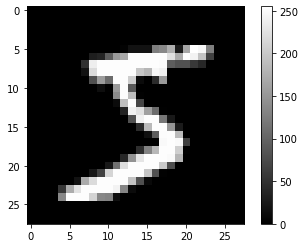

In [9]:
plt.figure()
plt.imshow(train_digits[0], cmap='gray_r')
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_digits, test_digits = train_digits / 255.0 , test_digits / 255.0

In [11]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), # input layer (1)
                          keras.layers.Dense(128, activation='relu'), # hidden layer (2)
                          keras.layers.Dense(10, activation='softmax') # output layer (3)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_digits, train_labels, epochs=20, batch_size=100)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.5871 - accuracy: 0.8361
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1653 - accuracy: 0.9518
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1142 - accuracy: 0.9681
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0871 - accuracy: 0.9757
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0660 - accuracy: 0.9810
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0529 - accuracy: 0.9855
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0413 - accuracy: 0.9883
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0355 - accuracy: 0.9897
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0288 - accuracy: 0.9924
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0240 - accuracy: 0.9944

In [13]:
test_loss, test_acc = model.evaluate(test_digits, test_labels, verbose=1)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 1ms/step - loss: 0.0763 - accuracy: 0.9801
Test accuracy: 0.9800999760627747
Test loss: 0.07633646577596664


          Prediction: 0


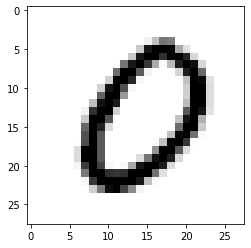

KeyboardInterrupt: ignored

In [15]:
predictions = model.predict(test_digits)

for i in range(6000):
  prediction = class_names[np.argmax(predictions[i])]
  print("          Prediction:", prediction)
  plt.figure()
  plt.imshow(test_digits[i], cmap='gray_r')
  plt.show()
  time.sleep(5)
  clear_output()

In [16]:
model.save("digits.h5")